In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.60
Confusion Matrix:
[[3071  607   51    6    7]
 [ 845 1144  106   25    6]
 [ 381  515   90   23   13]
 [  93  112   34   16    6]
 [  30   34    9    2    6]]
Classification Report:
              precision    recall  f1-score   support

    NoInjury       0.69      0.82      0.75      3742
       Minor       0.47      0.54      0.50      2126
    Moderate       0.31      0.09      0.14      1022
      Severe       0.22      0.06      0.10       261
       Fatal       0.16      0.07      0.10        81

    accuracy                           0.60      7232
   macro avg       0.37      0.32      0.32      7232
weighted avg       0.55      0.60      0.56      7232



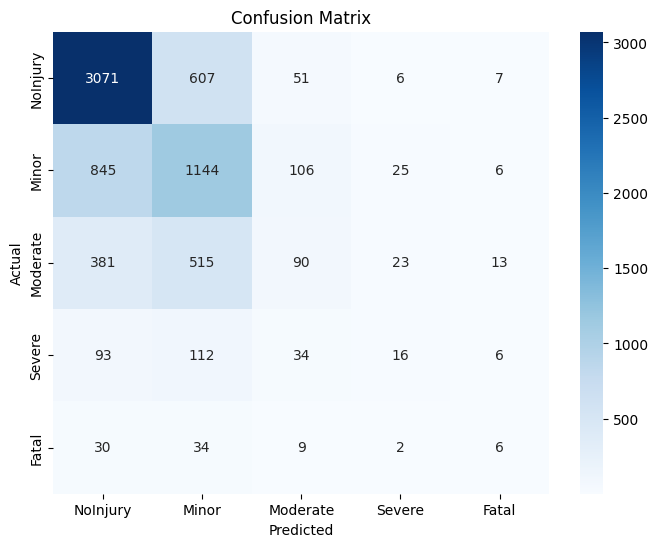

In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the datasets (assuming they are CSVs or DataFrames)
vehicle_data = pd.read_csv('preprocessed_vehicle_data.csv')
crash_data = pd.read_csv('preprocessed_crashes_data.csv')

# 1. Merge datasets based on CrashName
merged_data = pd.merge(vehicle_data, crash_data, how='inner', left_on='CrashName', right_on='Name')

# 2. Feature Engineering
# Create a new 'Severity' column based on the injuries

def determine_severity(row):
    if row['FatalInjuries'] > 0:
        return 'Fatal'
    elif row['SevereInjuries'] > 0:
        return 'Severe'
    elif row['ModerateInjuries'] > 0:
        return 'Moderate'
    elif row['MinorInjuries'] > 0:
        return 'Minor'
    else:
        return 'NoInjury'

merged_data['Severity'] = merged_data.apply(determine_severity, axis=1)

# Encode categorical variables like 'PartyType', 'Sobriety_Code', etc.
# Convert 'Severity' to numerical labels (0: NoInjury, 1: Minor, 2: Moderate, 3: Severe, 4: Fatal)
severity_mapping = {'NoInjury': 0, 'Minor': 1, 'Moderate': 2, 'Severe': 3, 'Fatal': 4}
merged_data['Severity_Code'] = merged_data['Severity'].map(severity_mapping)

# Select relevant features and the target variable (Severity_Code)
X = merged_data[['PartyType_Code', 'Sobriety_Code', 'Age', 'SpeedingFlag']]  # Add other relevant features here
y = merged_data['Severity_Code']

# 3. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = rf.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix and Classification Report
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=severity_mapping.keys()))

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=severity_mapping.keys(), yticklabels=severity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.54
Confusion Matrix:
[[3109  633    0    0    0]
 [1296  830    0    0    0]
 [ 693  329    0    0    0]
 [ 155  106    0    0    0]
 [  50   31    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

    NoInjury       0.59      0.83      0.69      3742
       Minor       0.43      0.39      0.41      2126
    Moderate       0.00      0.00      0.00      1022
      Severe       0.00      0.00      0.00       261
       Fatal       0.00      0.00      0.00        81

    accuracy                           0.54      7232
   macro avg       0.20      0.24      0.22      7232
weighted avg       0.43      0.54      0.48      7232



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

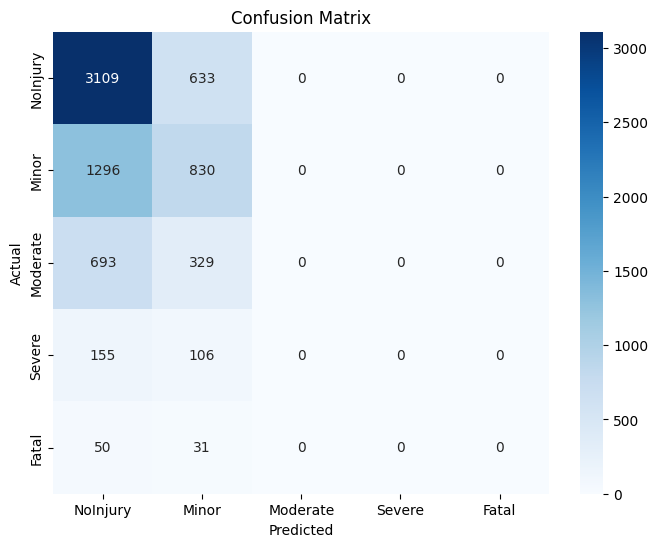

In [7]:
from sklearn.linear_model import LogisticRegression

# 4. Train a Logistic Regression model (using multinomial for multi-class classification)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix and Classification Report
print('Confusion Matrix:')
con_matrix = confusion_matrix(y_test, y_pred)
print(con_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=severity_mapping.keys()))

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=severity_mapping.keys(), yticklabels=severity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()